In [17]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from pipeline import loader as lo
from pipeline import classifier as clas
from pipeline import explorer as ex
from pipeline import processor as pro
from pipeline import _util as ut
from pipeline import evaluator as ev
from pipeline import features_generator as fe
from datetime import timedelta
import pandas as pd
import main

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Finacial Distress Prediction ( pipeline skeleton)

## 1. Load Data
#### - Load data from csv file
#### - Check the data type of each column

In [18]:
df = lo.load('projects_2012_2013.csv')

In [19]:
df.dtypes

projectid                                  object
teacher_acctid                             object
schoolid                                   object
school_ncesid                             float64
school_latitude                           float64
school_longitude                          float64
school_city                                object
school_state                               object
school_metro                               object
school_district                            object
school_county                              object
school_charter                             object
school_magnet                              object
teacher_prefix                             object
primary_focus_subject                      object
primary_focus_area                         object
secondary_focus_subject                    object
secondary_focus_area                       object
resource_type                              object
poverty_level                              object


## 2. Explore Data

### 1. show the missing rate of each column

In [31]:
df.isnull().sum(axis=0)/ df.shape[0]

projectid                                       0.0
teacher_acctid                                  0.0
schoolid                                        0.0
school_ncesid                                   0.0
school_latitude                                 0.0
school_longitude                                0.0
school_charter                                  0.0
school_magnet                                   0.0
total_price_including_optional_support          0.0
students_reached                                0.0
eligible_double_your_impact_match               0.0
date_posted                                     0.0
datefullyfunded                                 0.0
school_state_AK                                 0.0
school_state_AL                                 0.0
school_state_AR                                 0.0
school_state_AZ                                 0.0
school_state_CA                                 0.0
school_state_CO                                 0.0
school_state

In [ ]:
pro.fill_median(df, ['students_reached'])

#### drop the unuseful columns, 
#### make catogorical columns
#### make the t,f s to 1,0

In [21]:
df = ex.drop_cols(df,['school_city', 'school_district', 'school_county'])
cat_cols = ['school_state', 'school_metro', 
            'teacher_prefix', 'resource_type', 
            'primary_focus_subject', 'primary_focus_area',
            'secondary_focus_subject', 'secondary_focus_area',
            'poverty_level', 'grade_level']
df = fe.dummize(df, cat_cols)
tf_cols = ['school_charter', 'school_magnet', 
           'eligible_double_your_impact_match']
df = ex.replace_tfs(df, tf_cols)

### 2.build the outcome

In [22]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['datefullyfunded'] = pd.to_datetime(df['datefullyfunded'])
df['fully_funded_in_60_days'] = \
    (df['datefullyfunded'] - df['date_posted'] > pd.to_timedelta(60, unit='days')).astype('int')

In [25]:
df = df.dropna()

In [26]:
xs_lst = [item for item in df.columns if item not in {'date_posted',
                                                        'datefullyfunded',
                                                        'fully_funded_in_60_days',
                                                       'projectid',
                                                       'teacher_acctid',
                                                       'schoolid',
                                                       'school_ncesid'}]

In [53]:
grid_size = 'test'
clfs, grid = clas.define_clfs_params(grid_size)
models_to_run=['RF','DT','KNN', 'ET', 'AB', 'GB', 'LR', 'NB','BG']
res = main.run_time_validation(models_to_run, clfs, grid, grid_size,
    df, '2012-01-01' ,'2014-1-1' , 6, 6, 'date_posted', xs_lst, ['fully_funded_in_60_days'])

2012-01-01 00:00:00 2013-05-02 00:00:00 2013-07-01 00:00:00 2014-01-01 00:00:00
RF
DT
KNN
ET
AB
GB
LR
NB
BG
2012-01-01 00:00:00 2012-11-02 00:00:00 2013-01-01 00:00:00 2013-07-01 00:00:00
RF
DT
KNN
ET
AB
GB
LR
NB
BG
2012-01-01 00:00:00 2012-05-02 00:00:00 2012-07-01 00:00:00 2013-01-01 00:00:00
RF
DT
KNN
ET
AB
GB
LR
NB
BG


In [54]:
res

,train_start,train_end,test_start,test_end,model_type,clf,parameters,auc-roc,baseline_at_1,baseline_at_2,...,precision_at_20,precision_at_30,precision_at_50,recall_at_1,recall_at_2,recall_at_5,recall_at_10,recall_at_20,recall_at_30,recall_at_50
0,2012-01-01,2013-05-02,2013-07-01,2014-01-01,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'min_samples_split': 10, 'max_features': 'sqr...",0.693065,0.002268,0.001133,...,0.468131,0.443698,0.399493,0.020442,0.040566,0.094098,0.178492,0.328906,0.467626,0.701718
1,2012-01-01,2013-05-02,2013-07-01,2014-01-01,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'min_samples_split': 10,...",0.665827,0.002268,0.001133,...,0.440734,0.425509,0.388353,0.012488,0.022908,0.062679,0.145721,0.309656,0.448457,0.682151
2,2012-01-01,2013-05-02,2013-07-01,2014-01-01,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'weights': 'uniform', 'algorithm': 'auto', 'n...",0.568186,0.002268,0.001133,...,0.329220,0.287925,0.401214,0.000080,0.000080,0.058463,0.058463,0.231308,0.303452,0.704741
3,2012-01-01,2013-05-02,2013-07-01,2014-01-01,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'min_samples_split': 10, 'criterion': 'gini',...",0.633325,0.002268,0.001133,...,0.422733,0.397509,0.364307,0.019090,0.036430,0.085348,0.160595,0.297009,0.418947,0.639914
4,2012-01-01,2013-05-02,2013-07-01,2014-01-01,AB,"(DecisionTreeClassifier(class_weight=None, cri...","{'algorithm': 'SAMME', 'n_estimators': 100}",0.669376,0.002268,0.001133,...,0.431903,0.427396,0.378255,0.014636,0.030624,0.083280,0.160197,0.303452,0.450445,0.664413
5,2012-01-01,2013-05-02,2013-07-01,2014-01-01,GB,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.1, 'n_estimators': 100, 'm...",0.686584,0.002268,0.001133,...,0.462470,0.439019,0.397591,0.019408,0.037544,0.092587,0.172924,0.324928,0.462695,0.698377
6,2012-01-01,2013-05-02,2013-07-01,2014-01-01,LR,"LogisticRegression(C=0.01, class_weight=None, ...","{'penalty': 'l1', 'C': 0.01}",0.655738,0.002268,0.001133,...,0.444696,0.422264,0.380157,0.016306,0.032214,0.082724,0.161868,0.312440,0.445037,0.667754
7,2012-01-01,2013-05-02,2013-07-01,2014-01-01,NB,GaussianNB(priors=None),{},0.578639,0.002268,0.001133,...,0.353108,0.356000,0.336141,0.010500,0.023863,0.063315,0.124483,0.248091,0.375199,0.590439
8,2012-01-01,2013-05-02,2013-07-01,2014-01-01,BG,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_samples': 50, 'max_features': 50, 'n_est...",0.547045,0.002268,0.001133,...,0.319484,0.259698,0.344654,0.007238,0.023226,0.055043,0.109688,0.224467,0.273703,0.605393
0,2012-01-01,2012-11-02,2013-01-01,2013-07-01,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'min_samples_split': 10, 'max_features': 'sqr...",0.683147,0.004608,0.002304,...,0.504722,0.480805,0.431401,0.018813,0.037626,0.090273,0.171795,0.319527,0.456614,0.682806


### 4. Compare all the models

In [68]:
res.sort_values(by = 'auc-roc',ascending = True).head(10)[['model_type','parameters','clf','train_start','train_end','auc-roc']]

,model_type,parameters,clf,train_start,train_end,auc-roc
8,BG,"{'max_samples': 50, 'max_features': 50, 'n_est...","(DecisionTreeClassifier(class_weight=None, cri...",2012-01-01,2012-05-02,0.531555
8,BG,"{'max_samples': 50, 'max_features': 50, 'n_est...","(DecisionTreeClassifier(class_weight=None, cri...",2012-01-01,2012-11-02,0.534146
8,BG,"{'max_samples': 50, 'max_features': 50, 'n_est...","(DecisionTreeClassifier(class_weight=None, cri...",2012-01-01,2013-05-02,0.547045
7,NB,{},GaussianNB(priors=None),2012-01-01,2012-05-02,0.555974
2,KNN,"{'weights': 'uniform', 'algorithm': 'auto', 'n...","KNeighborsClassifier(algorithm='auto', leaf_si...",2012-01-01,2012-05-02,0.557672
7,NB,{},GaussianNB(priors=None),2012-01-01,2012-11-02,0.560217
2,KNN,"{'weights': 'uniform', 'algorithm': 'auto', 'n...","KNeighborsClassifier(algorithm='auto', leaf_si...",2012-01-01,2013-05-02,0.568186
2,KNN,"{'weights': 'uniform', 'algorithm': 'auto', 'n...","KNeighborsClassifier(algorithm='auto', leaf_si...",2012-01-01,2012-11-02,0.574580
7,NB,{},GaussianNB(priors=None),2012-01-01,2013-05-02,0.578639
3,ET,"{'min_samples_split': 10, 'criterion': 'gini',...","(ExtraTreeClassifier(class_weight=None, criter...",2012-01-01,2012-05-02,0.617706


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

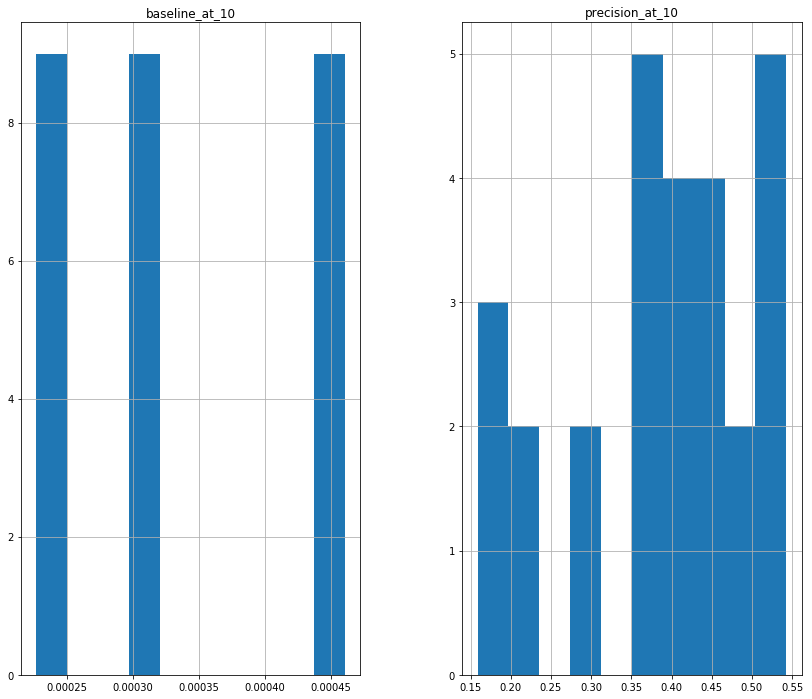

In [65]:
ut.hist_some(res,['baseline_at_10','precision_at_10'])

### 5 Tag all the data as is_out or common data point

Use the same approch to tag all the outlier in the column is_outlier. To get a basic information about the data we have, In the following table we can see that we have 1557 outlier data point, and we have 39459 regular data point.

In [11]:
tag_df = ex.tag_out(df)
tag_df.groupby('is_out').count()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
is_out,,,,,,,,,,,,
False,39459,39459,39459,39459,39459,39459,32181,39459,39459,39459,39459,38483
True,1557,1557,1557,1557,1557,1557,861,1557,1557,1557,1557,1496


## 3. Pre-process Data

In [12]:
lst_need_fill = [item for item in df.columns if item != 'SeriousDlqin2yrs']
pro.fill_median(df,[lst_need_fill])

Since we plan to use the logistic regression as a model, it's very sensitive to the outliers. And the outliers have a great impact with mean, here we choose to fill the Null with median.

In [13]:
df.median()

SeriousDlqin2yrs                            0.000000
RevolvingUtilizationOfUnsecuredLines        0.189730
age                                        51.000000
zipcode                                 60625.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.369736
MonthlyIncome                            5250.000000
NumberOfOpenCreditLinesAndLoans             8.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          0.000000
is_out                                      0.000000
dtype: float64

## 4. Generate Features

In [14]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'is_out'],
      dtype='object')

In [15]:
DEP_BINS = [0, 3, 6, 13]
DEP_LABELS = [1, 2, 3]
DEP_CAT = 'dep_category'
after_bin = fe.binize(df, 'NumberOfDependents', DEP_BINS, DEP_LABELS, DEP_CAT)
after_bin.drop('NumberOfDependents', inplace=True, axis=1)

In [16]:
after_dummy = fe.dummize(after_bin, 'zipcode')
after_dummy.drop('zipcode', inplace=True, axis=1)

Notice that Number of Dependents' distribution is very clusted in small numbers. There are much fewer people in this data set have 13 dependents than those have 2 dependents. We think maybe it's a good practice to make 3 bins out of the number of dependents. 'dep_small', 'dep_median', 'dep_large' refer to have [0,3),[4,6),[7,13] as the cutoff line of the bins.

For the zipcode, we know that the data only from some neighborhood, we can transform the zipcode to dummies.

## 5. Build Classifier

#### Split the data into four sub datasets, x_train, y_train, x_test, y_test

In [17]:
xs_lst = [item for item in after_dummy.columns if item != 'SeriousDlqin2yrs']
xs_df,y_df = after_dummy[xs_lst], after_dummy['SeriousDlqin2yrs']
x_train, x_test, y_train, y_test = clas.split_data(xs_df, y_df, 0.3, 19870715)

#### Since we have many features, we need to get the optimal set of feature that maximize the likelihood of the dataset's output. We use RFE with cross validation to come up with the optimal set of features that we will use to build the model.

In [18]:
features, support, ranking = clas.select_feature(x_train, y_train)

In [19]:
features

,0
0,RevolvingUtilizationOfUnsecuredLines
1,age
2,NumberOfTime30-59DaysPastDueNotWorse
4,MonthlyIncome
5,NumberOfOpenCreditLinesAndLoans
6,NumberOfTimes90DaysLate
7,NumberRealEstateLoansOrLines
8,NumberOfTime60-89DaysPastDueNotWorse
9,is_out
10,dep_category


#### We split the dataset with another random seed, then we use the features above to build the logistic regression model.

## 6. Evaluate Classifier

#### Get the predictions

#### show accuracy 

#### Accuracy is the fraction of predictions our model got right. In total, we have the 84.9% change to make the right classification using this model

#### Compute precision, recall, F-measure and support

#### Show the ROC curve

In [25]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')